In [3]:
# Load Python Libraries
import time
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json

## User with 5 Latent Factors vs Top Recommended Book

In [96]:
filepath = '/Users/IlanaWeinstein/desktop/TSNE/user_tsne_data5.csv'
df = pd.read_csv(filepath, header = 0)

In [97]:
df.head()

,user_id,1,2,3,4,5,book_rec,book_id_gr
0,367741,0.926578,0.912996,0.470472,0.004003,1.202830,373035,23492790
1,810633,1.013187,0.745624,0.078748,0.123402,0.764156,373035,23492790
2,160456,1.006432,1.152823,0.018186,0.540512,0.987095,373035,23492790
3,597517,1.623179,1.231682,0.126492,0.000000,1.392193,373035,23492790
4,376819,0.720390,0.889970,0.284749,0.244398,0.860152,373035,23492790


In [98]:
df_subset = df.drop(['user_id','book_rec', 'book_id_gr'], axis = 1)

In [99]:
df_subset.head()

,1,2,3,4,5
0,0.926578,0.912996,0.470472,0.004003,1.202830
1,1.013187,0.745624,0.078748,0.123402,0.764156
2,1.006432,1.152823,0.018186,0.540512,0.987095
3,1.623179,1.231682,0.126492,0.000000,1.392193
4,0.720390,0.889970,0.284749,0.244398,0.860152


In [100]:
N = df_subset.shape[0]
perp = int(N**(.5))
print('Using a perplexity of {}'.format(perp))

num_labels = df['book_rec'].nunique()
print('Number of labels is {}'.format(num_labels))

Using a perplexity of 84
Number of labels is 333


In [101]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000)
tsne_results = tsne.fit_transform(df_subset)

[t-SNE] Computing 253 nearest neighbors...
[t-SNE] Indexed 7097 samples in 0.005s...
[t-SNE] Computed neighbors for 7097 samples in 0.984s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7097
[t-SNE] Computed conditional probabilities for sample 2000 / 7097
[t-SNE] Computed conditional probabilities for sample 3000 / 7097
[t-SNE] Computed conditional probabilities for sample 4000 / 7097
[t-SNE] Computed conditional probabilities for sample 5000 / 7097
[t-SNE] Computed conditional probabilities for sample 6000 / 7097
[t-SNE] Computed conditional probabilities for sample 7000 / 7097
[t-SNE] Computed conditional probabilities for sample 7097 / 7097
[t-SNE] Mean sigma: 0.206578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.168411
[t-SNE] KL divergence after 1000 iterations: 1.952361


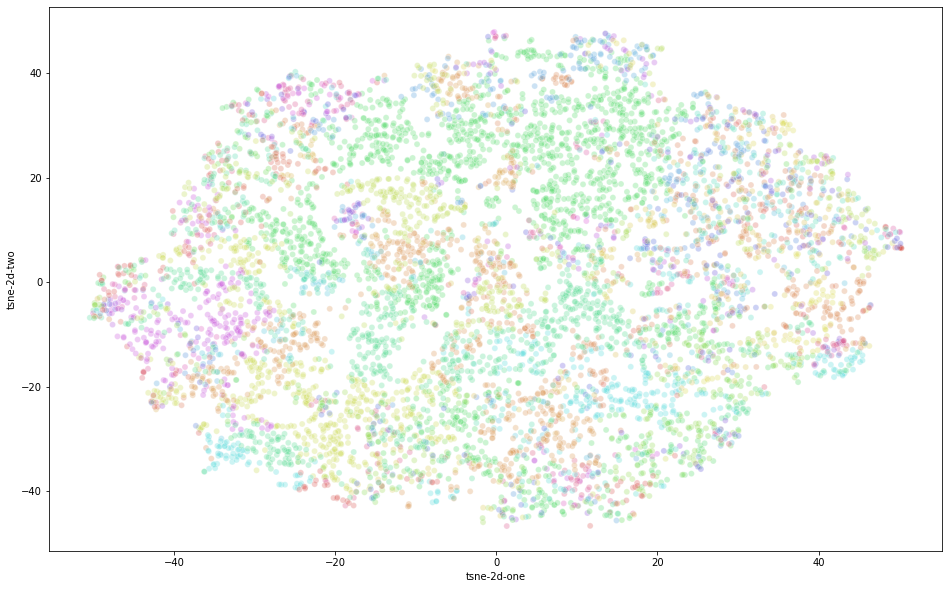

In [102]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='book_rec',
    palette=sns.color_palette("hls", 333),
    data=df,
    legend=False,
    alpha=0.3
)

## User with 10 Latent Factors vs Top Recommended Book

In [104]:
filepath = '/Users/IlanaWeinstein/desktop/TSNE/user_tsne_data10.csv'
df2 = pd.read_csv(filepath, header = 0)

In [105]:
df2.head()

,user_id,1,2,3,4,5,6,7,8,9,10,book_rec
0,7877,0.7146723,0.6100351,0.6149209,0.30845752,0.6007513,0.22002712,0.70814425,0.5719414,0.23305525,0.70531094,994141
1,13015,0.5500008,0.6514763,0.31391126,0.0,1.0755763,0.58876467,0.029914387,0.47981098,0.27626887,0.46297848,824704
2,14407,1.0779237,0.0,0.0,0.0,0.80202776,0.4580192,0.30909148,0.023177557,0.0,0.09221454,1736638
3,36632,0.58653885,0.24085782,0.5003505,0.8339458,1.0820714,0.33718732,0.69618136,0.27216613,0.4847642,0.46664026,675604
4,38160,0.77261424,0.69782585,0.58557594,0.73895764,0.92105734,0.6817355,0.49712902,0.48573607,0.7072243,0.51441276,1149229


In [106]:
df_subset2 = df2.drop(['user_id','book_rec'], axis = 1)

In [107]:
df_subset2.head()

,1,2,3,4,5,6,7,8,9,10
0,0.7146723,0.6100351,0.6149209,0.30845752,0.6007513,0.22002712,0.70814425,0.5719414,0.23305525,0.70531094
1,0.5500008,0.6514763,0.31391126,0.0,1.0755763,0.58876467,0.029914387,0.47981098,0.27626887,0.46297848
2,1.0779237,0.0,0.0,0.0,0.80202776,0.4580192,0.30909148,0.023177557,0.0,0.09221454
3,0.58653885,0.24085782,0.5003505,0.8339458,1.0820714,0.33718732,0.69618136,0.27216613,0.4847642,0.46664026
4,0.77261424,0.69782585,0.58557594,0.73895764,0.92105734,0.6817355,0.49712902,0.48573607,0.7072243,0.51441276


In [108]:
N = df_subset2.shape[0]
perp = int(N**(.5))
print('Using a perplexity of {}'.format(perp))

num_labels = df2['book_rec'].nunique()
print('Number of labels is {}'.format(num_labels))

Using a perplexity of 84
Number of labels is 552


In [109]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000)
tsne_results = tsne.fit_transform(df_subset2)

[t-SNE] Computing 253 nearest neighbors...
[t-SNE] Indexed 7097 samples in 0.026s...
[t-SNE] Computed neighbors for 7097 samples in 1.731s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7097
[t-SNE] Computed conditional probabilities for sample 2000 / 7097
[t-SNE] Computed conditional probabilities for sample 3000 / 7097
[t-SNE] Computed conditional probabilities for sample 4000 / 7097
[t-SNE] Computed conditional probabilities for sample 5000 / 7097
[t-SNE] Computed conditional probabilities for sample 6000 / 7097
[t-SNE] Computed conditional probabilities for sample 7000 / 7097
[t-SNE] Computed conditional probabilities for sample 7097 / 7097
[t-SNE] Mean sigma: 0.299101
[t-SNE] KL divergence after 50 iterations with early exaggeration: 80.355331
[t-SNE] KL divergence after 1000 iterations: 2.817048


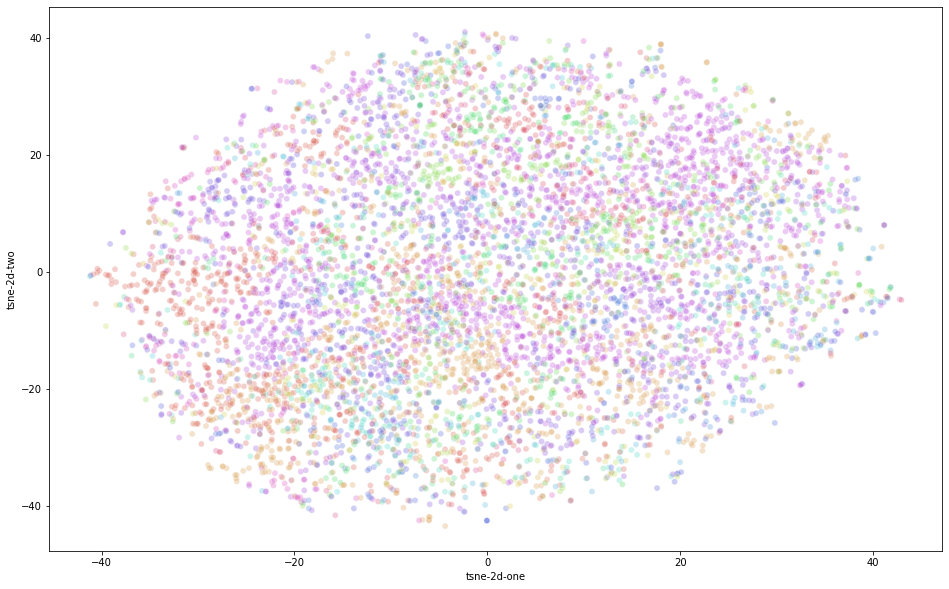

In [110]:
df2['tsne-2d-one'] = tsne_results[:,0]
df2['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='book_rec',
    palette=sns.color_palette("hls", num_labels),
    data=df2,
    legend=False,
    alpha=0.3
)

# Adding Genres

High rank did not help visualize possible clusters therefore will continue visualizations only on 5.

## User with 5 Latent Factors vs Genre of Top Recommended Book

In [111]:
file_path = '/Users/IlanaWeinstein/desktop/TSNE/goodreads_book_genres_initial.json'
genres = [json.loads(line) for line in open(file_path, 'r')]

In [112]:
#Example of linke in goodreads book genres
genres[0]

{'book_id': '5333265', 'genres': {'history, historical fiction, biography': 1}}

In [113]:
#Creating dict to map FIRST/TOP genre to book_id
genres_dict = {}
for i in range(len(genres)):
    key = genres[i]['book_id']
    val_list = list(genres[i]['genres'].keys())
    if len(val_list) == 0:
        genres_dict[key] = 'None'
    else:
        genres_dict[key] = val_list[0]

genres_dict
    

{'5333265': 'history, historical fiction, biography',
 '1333909': 'fiction',
 '7327624': 'fantasy, paranormal',
 '6066819': 'fiction',
 '287140': 'non-fiction',
 '287141': 'history, historical fiction, biography',
 '378460': 'fiction',
 '6066812': 'fantasy, paranormal',
 '34883016': 'romance',
 '287149': 'non-fiction',
 '6066814': 'fiction',
 '33394837': 'fantasy, paranormal',
 '89371': 'non-fiction',
 '28575155': 'None',
 '89373': 'fiction',
 '89375': 'non-fiction',
 '89376': 'non-fiction',
 '89377': 'fiction',
 '89378': 'children',
 '21401188': 'fiction',
 '30227122': 'None',
 '2008911': 'fiction',
 '2008910': 'fiction',
 '7203847': 'fiction',
 '6158967': 'non-fiction',
 '12182387': 'young-adult',
 '287142': 'None',
 '16037548': 'None',
 '16037549': 'poetry',
 '12135833': 'fiction',
 '18628482': 'young-adult',
 '29074697': 'fantasy, paranormal',
 '18628480': 'fiction',
 '16037543': 'history, historical fiction, biography',
 '29074693': 'fantasy, paranormal',
 '1902202': 'mystery, thr

In [114]:
df.head()

,user_id,1,2,3,4,5,book_rec,book_id_gr,tsne-2d-one,tsne-2d-two
0,367741,0.926578,0.912996,0.470472,0.004003,1.202830,373035,23492790,-6.642320,40.164001
1,810633,1.013187,0.745624,0.078748,0.123402,0.764156,373035,23492790,-32.429226,34.057217
2,160456,1.006432,1.152823,0.018186,0.540512,0.987095,373035,23492790,-35.689884,11.814362
3,597517,1.623179,1.231682,0.126492,0.000000,1.392193,373035,23492790,-3.456789,41.722553
4,376819,0.720390,0.889970,0.284749,0.244398,0.860152,373035,23492790,-13.906404,13.780296


In [115]:
df['book_id_gr'] = df['book_id_gr'].astype(str)
df['genre'] = df['book_id_gr'].map(genres_dict)
df['genre'] = df['genre'].astype(str)

In [116]:
df.head()

,user_id,1,2,3,4,5,book_rec,book_id_gr,tsne-2d-one,tsne-2d-two,genre
0,367741,0.926578,0.912996,0.470472,0.004003,1.202830,373035,23492790,-6.642320,40.164001,non-fiction
1,810633,1.013187,0.745624,0.078748,0.123402,0.764156,373035,23492790,-32.429226,34.057217,non-fiction
2,160456,1.006432,1.152823,0.018186,0.540512,0.987095,373035,23492790,-35.689884,11.814362,non-fiction
3,597517,1.623179,1.231682,0.126492,0.000000,1.392193,373035,23492790,-3.456789,41.722553,non-fiction
4,376819,0.720390,0.889970,0.284749,0.244398,0.860152,373035,23492790,-13.906404,13.780296,non-fiction


In [117]:
N = df_subset.shape[0]
perp = int(N**(.5))
print('Using a perplexity of {}'.format(perp))

num_labels = df['genre'].nunique()
print('Number of labels is {}'.format(num_labels))

Using a perplexity of 84
Number of labels is 11


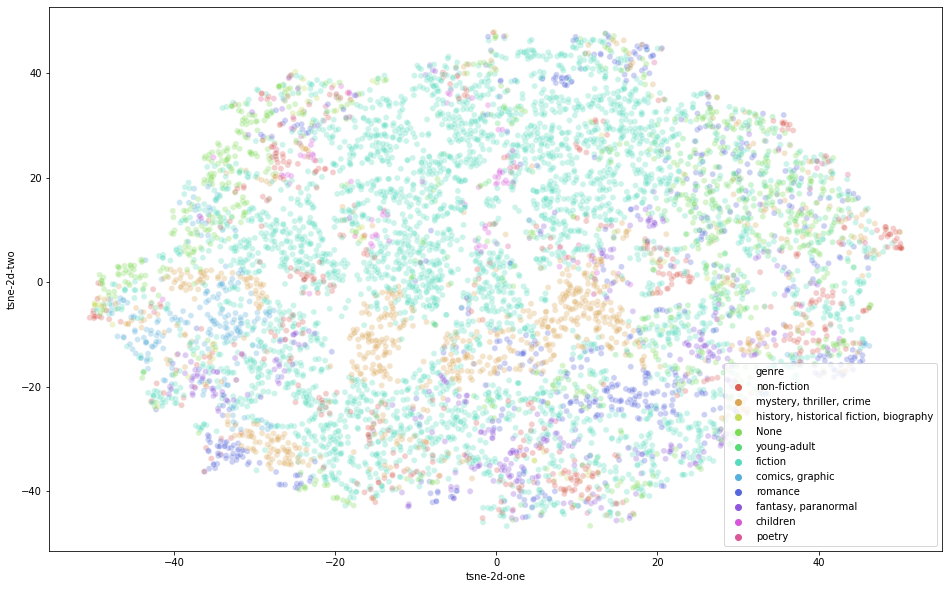

In [118]:
# df['tsne-2d-one'] = tsne_results[:,0]
# df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='genre',
    palette=sns.color_palette("hls", num_labels),
    data=df,
    legend='full',
    alpha=0.3
)

# ITEM LATENT FACTORS

## Item with 5 Latent Factors vs All Genres

In [119]:
filepath = '/Users/IlanaWeinstein/desktop/TSNE/item_tsne_data5.csv'
df = pd.read_csv(filepath, header = 0, names  = ['id','value1','value2','value3','value4','value5','book_id_csv','book_id']).drop('book_id_csv', axis = 1)

In [120]:
df.head()

,id,value1,value2,value3,value4,value5,book_id
0,148,0.422054,1.095999,0.660961,1.885631,1.020067,7015635
1,471,0.674608,0.575141,0.672891,0.809011,0.804843,9895917
2,496,1.946308,0.925165,0.577428,0.755915,0.523733,8694005
3,833,1.090415,0.848174,0.506678,1.141099,0.964272,32542
4,1088,0.815915,0.586089,0.729263,0.400328,1.530271,1812457


In [121]:
#Mapping top genre to book_id
df['book_id'] = df['book_id'].astype(str)
df['genre'] = df['book_id'].map(genres_dict)
df['genre'] = df['genre'].astype(str)

In [122]:
df.head()

,id,value1,value2,value3,value4,value5,book_id,genre
0,148,0.422054,1.095999,0.660961,1.885631,1.020067,7015635,non-fiction
1,471,0.674608,0.575141,0.672891,0.809011,0.804843,9895917,non-fiction
2,496,1.946308,0.925165,0.577428,0.755915,0.523733,8694005,fiction
3,833,1.090415,0.848174,0.506678,1.141099,0.964272,32542,fiction
4,1088,0.815915,0.586089,0.729263,0.400328,1.530271,1812457,fiction


In [123]:
df_subset = df.drop(['id','book_id','genre'], axis = 1)

In [124]:
df_subset.head()

,value1,value2,value3,value4,value5
0,0.422054,1.095999,0.660961,1.885631,1.020067
1,0.674608,0.575141,0.672891,0.809011,0.804843
2,1.946308,0.925165,0.577428,0.755915,0.523733
3,1.090415,0.848174,0.506678,1.141099,0.964272
4,0.815915,0.586089,0.729263,0.400328,1.530271


In [125]:
N = df_subset.shape[0]
perp = int(N**(.5))
print('Using a perplexity of {} on {} items'.format(perp,N))

num_labels = df['genre'].nunique()
print('Number of labels is {}'.format(num_labels))

Using a perplexity of 526 on 277551 items
Number of labels is 11


In [126]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity = 100, n_iter=1000)
tsne_results = tsne.fit_transform(df_subset)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 277551 samples in 0.533s...
[t-SNE] Computed neighbors for 277551 samples in 145.286s...
[t-SNE] Computed conditional probabilities for sample 1000 / 277551
[t-SNE] Computed conditional probabilities for sample 2000 / 277551
[t-SNE] Computed conditional probabilities for sample 3000 / 277551
[t-SNE] Computed conditional probabilities for sample 4000 / 277551
[t-SNE] Computed conditional probabilities for sample 5000 / 277551
[t-SNE] Computed conditional probabilities for sample 6000 / 277551
[t-SNE] Computed conditional probabilities for sample 7000 / 277551
[t-SNE] Computed conditional probabilities for sample 8000 / 277551
[t-SNE] Computed conditional probabilities for sample 9000 / 277551
[t-SNE] Computed conditional probabilities for sample 10000 / 277551
[t-SNE] Computed conditional probabilities for sample 11000 / 277551
[t-SNE] Computed conditional probabilities for sample 12000 / 277551
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 118000 / 277551
[t-SNE] Computed conditional probabilities for sample 119000 / 277551
[t-SNE] Computed conditional probabilities for sample 120000 / 277551
[t-SNE] Computed conditional probabilities for sample 121000 / 277551
[t-SNE] Computed conditional probabilities for sample 122000 / 277551
[t-SNE] Computed conditional probabilities for sample 123000 / 277551
[t-SNE] Computed conditional probabilities for sample 124000 / 277551
[t-SNE] Computed conditional probabilities for sample 125000 / 277551
[t-SNE] Computed conditional probabilities for sample 126000 / 277551
[t-SNE] Computed conditional probabilities for sample 127000 / 277551
[t-SNE] Computed conditional probabilities for sample 128000 / 277551
[t-SNE] Computed conditional probabilities for sample 129000 / 277551
[t-SNE] Computed conditional probabilities for sample 130000 / 277551
[t-SNE] Computed conditional probabilities for sample 131000 / 277551
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 237000 / 277551
[t-SNE] Computed conditional probabilities for sample 238000 / 277551
[t-SNE] Computed conditional probabilities for sample 239000 / 277551
[t-SNE] Computed conditional probabilities for sample 240000 / 277551
[t-SNE] Computed conditional probabilities for sample 241000 / 277551
[t-SNE] Computed conditional probabilities for sample 242000 / 277551
[t-SNE] Computed conditional probabilities for sample 243000 / 277551
[t-SNE] Computed conditional probabilities for sample 244000 / 277551
[t-SNE] Computed conditional probabilities for sample 245000 / 277551
[t-SNE] Computed conditional probabilities for sample 246000 / 277551
[t-SNE] Computed conditional probabilities for sample 247000 / 277551
[t-SNE] Computed conditional probabilities for sample 248000 / 277551
[t-SNE] Computed conditional probabilities for sample 249000 / 277551
[t-SNE] Computed conditional probabilities for sample 250000 / 277551
[t-SNE] Computed con

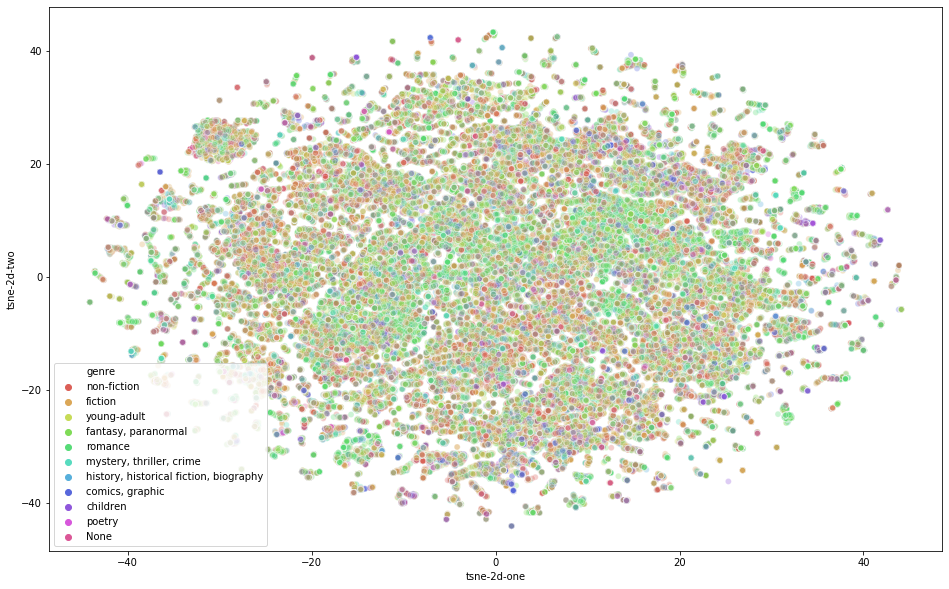

In [127]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='genre',
    palette=sns.color_palette("hls", num_labels),
    data=df,
    legend='full',
    alpha=0.3
)

## Item with 5 Latent Factors vs 3 Genres

In [45]:
df_filtered = df[(df['genre'] == 'non-fiction')|(df['genre'] == 'fiction') | (df['genre'] == 'romance')]
# df_filtered = df_filtered.drop(['tsne-2d-one','tsne-2d-two'], axis = 1)
df_subset = df_filtered.drop(['id','book_id','genre'], axis = 1)

In [46]:
N = df_subset.shape[0]
perp = int(N**(.5))
print('Using a perplexity of {}'.format(perp))

num_labels = df_filtered['genre'].nunique()
print('Number of labels is {}'.format(num_labels))

Using a perplexity of 389
Number of labels is 3


In [35]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity = perp, n_iter=1000)
tsne_results = tsne.fit_transform(df_subset)

[t-SNE] Computing 1168 nearest neighbors...
[t-SNE] Indexed 151605 samples in 0.154s...
[t-SNE] Computed neighbors for 151605 samples in 191.470s...
[t-SNE] Computed conditional probabilities for sample 1000 / 151605
[t-SNE] Computed conditional probabilities for sample 2000 / 151605
[t-SNE] Computed conditional probabilities for sample 3000 / 151605
[t-SNE] Computed conditional probabilities for sample 4000 / 151605
[t-SNE] Computed conditional probabilities for sample 5000 / 151605
[t-SNE] Computed conditional probabilities for sample 6000 / 151605
[t-SNE] Computed conditional probabilities for sample 7000 / 151605
[t-SNE] Computed conditional probabilities for sample 8000 / 151605
[t-SNE] Computed conditional probabilities for sample 9000 / 151605
[t-SNE] Computed conditional probabilities for sample 10000 / 151605
[t-SNE] Computed conditional probabilities for sample 11000 / 151605
[t-SNE] Computed conditional probabilities for sample 12000 / 151605
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 119000 / 151605
[t-SNE] Computed conditional probabilities for sample 120000 / 151605
[t-SNE] Computed conditional probabilities for sample 121000 / 151605
[t-SNE] Computed conditional probabilities for sample 122000 / 151605
[t-SNE] Computed conditional probabilities for sample 123000 / 151605
[t-SNE] Computed conditional probabilities for sample 124000 / 151605
[t-SNE] Computed conditional probabilities for sample 125000 / 151605
[t-SNE] Computed conditional probabilities for sample 126000 / 151605
[t-SNE] Computed conditional probabilities for sample 127000 / 151605
[t-SNE] Computed conditional probabilities for sample 128000 / 151605
[t-SNE] Computed conditional probabilities for sample 129000 / 151605
[t-SNE] Computed conditional probabilities for sample 130000 / 151605
[t-SNE] Computed conditional probabilities for sample 131000 / 151605
[t-SNE] Computed conditional probabilities for sample 132000 / 151605
[t-SNE] Computed con

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


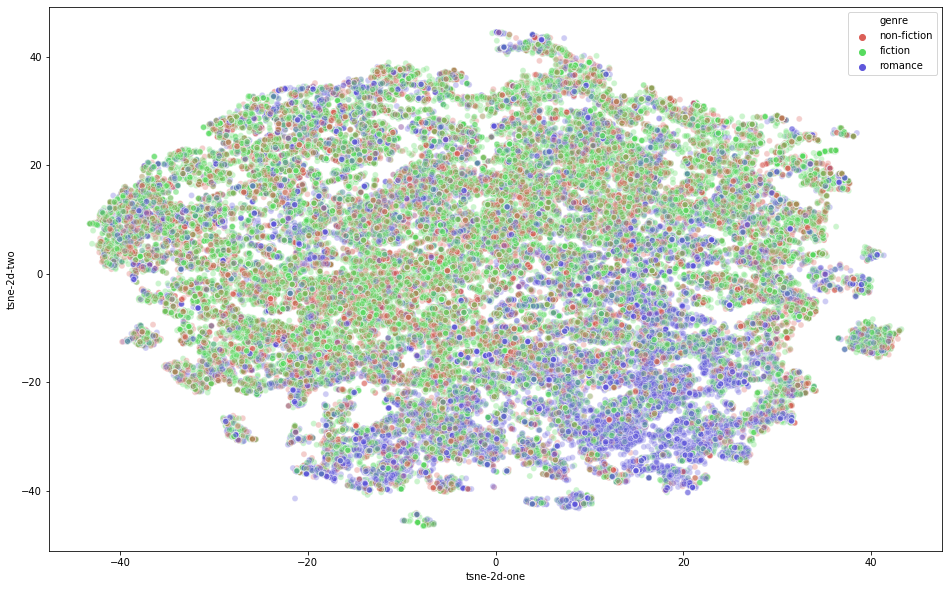

In [36]:
df_filtered['tsne-2d-one'] = tsne_results[:,0]
df_filtered['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='genre',
    palette=sns.color_palette("hls", num_labels),
    data=df_filtered,
    legend='full',
    alpha=0.3
)